<div align='center'><b><font size=4.5>Анализ данных о постоянных клиентах интернет-магазина <font color='#2694DE'>«В один клик»</font><br>для разработки системы персонализированных предложений</font></b></div>
<hr>

<p style='text-align: justify;'>В данной работе проводится анализ данных для разработки системы персонализированных предложений для удержания постоянных клиентов интернет-магазина <b>«В один клик»</b>. В условиях снижения покупательской активности необходимо найти эффективные методы взаимодействия с существующими клиентами для поддержания их интереса и увеличения объема покупок. Система персонализации будет основана на анализе поведения покупателей и их предпочтений, что позволит предлагать наиболее релевантные товары и услуги.</p>

<hr>
<div align='center'><b>Описание данных</b></div>

<ul> 
<i>Информация о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении (market_file.csv):</i><br><br>
<li><b>id</b> — номер покупателя в корпоративной базе данных.</li>
<li><b>Покупательская активность</b> — рассчитанный класс покупательской активности (целевой признак): <i>«снизилась»</i> или <i>«прежний уровень»</i>.</li>
<li><b>Тип сервиса</b> — уровень сервиса, например <i>«премиум»</i> и <i>«стандарт»</i>.</li>
<li><b>Разрешить сообщать</b> — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.</li>
<li><b>Маркет_актив_6_мес</b> — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.</li>
<li><b>Маркет_актив_тек_мес</b> — количество маркетинговых коммуникаций в текущем месяце.</li>
<li><b>Длительность</b> — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.</li>
<li><b>Акционные_покупки</b> — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.</li>
<li><b>Популярная_категория</b> —  самая популярная категория товаров у покупателя за последние 6 месяцев.</li>
<li><b>Средний_просмотр_категорий_за_визит</b> — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.</li>
<li><b>Неоплаченные_продукты_штук_квартал</b> — общее число неоплаченных товаров в корзине за последние 3 месяца.</li>
<li><b>Ошибка_сервиса</b> — число сбоев, которые коснулись покупателя во время посещения сайта.</li>
<li><b>Страниц_за_визит</b> — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.</li>
<br><br>
    
    
<i>Информация о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом (market_money.csv):</i><br><br>
<li><b>id</b> — номер покупателя в корпоративной базе данных.</li>
<li><b>Период</b> — название периода, во время которого зафиксирована выручка. Например, <i>'текущий_месяц'</i> или <i>'предыдущий_месяц'</i>.</li>
<li><b>Выручка</b> — сумма выручки за период.</li>
<br><br>
   
    
<i>Информация о времени (в минутах), которое покупатель провёл на сайте в течение периода (market_time.csv):</i><br><br>
<li><b>id</b> — номер покупателя в корпоративной базе данных.</li>
<li><b>Период</b> — название периода, во время которого зафиксировано общее время.</li>
<li><b>минут</b> — значение времени, проведённого на сайте, в минутах.</li>
<br><br>
   
    
<i>Информация о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю (money.csv):</i><br><br>
<li><b>id</b> — номер покупателя в корпоративной базе данных.</li>
<li><b>Прибыль</b> — значение прибыли.</li>
</ul>
<hr>
<div align='center'><b>Основные цели</b></div>

1. Разработать модель, которая предскажет вероятность снижения покупательской активности.
2. Выделить сегмент покупателей, проанализировать его и предложить, как увеличить его покупательскую активность. 

<hr>
<div align='center'><b>План работы</b></div>

1. [Загрузка данных](#download)
2. [Предобработка данных](#treatment):
3. [Исследовательский анализ данных](#analysis)
4. [Корреляционный анализ](#corr_analysis):
5. [Использование пайплайнов](#section_5)
6. [Анализ важности признаков](#section_6)
7. [Сегментация покупателей](#section_7)
8. [Итоговые выводы](#conclusion)
<br><br>


 <a id='download'></a>

In [1]:
!pip install --upgrade matplotlib==3.7.0 -q

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
libs = ['phik', 'optuna', 'optuna-integration', 'shap']

for lib in libs:
    try:
        __import__(lib)
    except ModuleNotFoundError:
        !pip install {lib} -q
        
import phik
from optuna.integration import OptunaSearchCV
from optuna import distributions
import shap

In [4]:
import pandas as pd
import numpy as np
import math
import re
import csv
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import logging
import contextlib
import sys

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.metrics import roc_auc_score, recall_score, make_scorer, precision_score, f1_score


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## Загрузка данных

In [5]:
def csv_download(file_name: str) -> pd.DataFrame:
    '''Accepts the name of the file(the file name is specified with the extension, 
    if the file does not lie in the folder with this notebook, 
    the full path should be specified). 
    Selects the delimiter and decimal separator for correct data reading.
    Returns the DataFrame object obtained from the file with the passed name.'''
    
    sniffer = csv.Sniffer()
    with open(file_name) as file:
        sample = file.read(5000)
        delimiter = sniffer.sniff(sample).delimiter
        
        file.seek(0)
        reader = csv.reader(file, delimiter=delimiter)
        decimal_counts = {'.': 0, ',': 0}
        for row in reader:
            for cell in row:
                if re.match(r'^\d+,\d+$', cell):
                    decimal_counts[','] += 1
                elif re.match(r'^\d+\.\d+$', cell):
                    decimal_counts['.'] += 1
        decimal_separator = max(decimal_counts, key=decimal_counts.get)
        
        file.seek(0)
        data = pd.read_csv(file, decimal=decimal_separator, delimiter=delimiter)
        
    return data

In [6]:
def batch_opening(file_names: list[str]) -> tuple[pd.DataFrame]:
    '''Accepts a list with file names 
    (the file name is specified with the extension, 
    if the file does not lie in the folder with this notebook, 
    the full path should be specified). 
    Returns a tuple of DataFrame objects, 
    the number of which is equal to the number of file names.'''
    
    results = []
    for file_name in file_names:
        results.append(csv_download(file_name))
    return results

In [7]:
file_names=['/datasets/market_file.csv', 
            '/datasets/market_money.csv', 
            '/datasets/market_time.csv', 
            '/datasets/money.csv']
data_mrkt_file, data_mrkt_money, data_mrkt_time, data_money = batch_opening(file_names)

In [8]:
frames = {'data_mrkt_file':data_mrkt_file, 
          'data_mrkt_money':data_mrkt_money, 
          'data_mrkt_time':data_mrkt_time, 
          'data_money':data_money}
for i, data in enumerate(frames.values(), 0):
    print()
    print(("\033[92mДАННЫЕ ИЗ ФАЙЛА \033[1m" + re.findall(r'/(\w+\.\w+)', file_names[i])[0]).center(140))
    display(data.head())
    display(data.info())


                                                  ДАННЫЕ ИЗ ФАЙЛА market_file.csv                                                  


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

None


                                                 ДАННЫЕ ИЗ ФАЙЛА market_money.csv                                                  


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None


                                                  ДАННЫЕ ИЗ ФАЙЛА market_time.csv                                                  


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None


                                                     ДАННЫЕ ИЗ ФАЙЛА money.csv                                                     


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

<hr>
<font size=4.5><b>Итоги раздела:</b></font>

В данном разделе были загружены данные из 4-х файлов в формате <i>.csv</i>. Данные в файлах соответствуют описанию. Полученные фреймы:

 - <b>data_mrkt_file</b> содержит 1300 строк и 13 столбцов. Пропущенных значений в фрейме нет. Типы данных: <i><font color='purple'>float</font></i>, <i><font color='purple'>int</font></i> и <i><font color='purple'>str</font></i>.
 - <b>data_mrkt_money</b> содержит 3900 строк и 3 столбца. Пропущенных значений в фрейме нет. Типы данных: <i><font color='purple'>float</font></i>, <i><font color='purple'>int</font></i> и <i><font color='purple'>str</font></i>.
 - <b>data_mrkt_time</b> содержит 2600 строк и 3 столбца. Пропущенных значений в фрейме нет. Типы данных: <i><font color='purple'>int</font></i> и <i><font color='purple'>str</font></i>.
 - <b>data_money</b> содержит 1300 строк и 2 столбца. Пропущенных значений в фрейме нет. Типы данных: <i><font color='purple'>int</font></i> и <i><font color='purple'>str</font></i>.
 
<hr>

 <a id='treatment'></a>

##  Предобработка данных

In [9]:
def show_unique_values(frames: list[pd.DataFrame], 
                       column_names: list[str], 
                       just_all_unique: bool=True) -> None:
    '''Display unique values from specified columns in given DataFrames.
    Does not return any value. It prints the results directly'''
    
    res = {}
    print()
    if not just_all_unique:
        for key, frame in frames.items():
            print(f'\033[92mУникальные значения в фрейме \033[1m{key}\033[0m\033[92m для столбца:\033[0m'.center(140))
            print('_'*120)
            for name in column_names:
                if name not in frame.columns:
                    continue
                res[name] = res.setdefault(name, set())
                res[name].update(frame[name].unique())
                print(f'\033[1m{name}\033[0m', sorted(frame[name].unique()), sep='\n', end='\n\n')
            print('_'*120, end='\n\n\n')
    else:
        for key, frame in frames.items():
            for name in column_names:
                if name not in frame.columns:
                    continue
                res[name] = res.setdefault(name, set())
                res[name].update(frame[name].unique())
            
    print(f'\033[92mВсе уникальные значения из всех фреймов\033[0m'.center(140))
    for key, value in res.items():
        print(f'\033[1m{key}:\033[0m')
        print(*(s.rjust(len(s) + 4) for s in sorted(value)), sep='\n', end='\n\n')


<hr>

Переименуем названия столбцов на англоязычные аналоги.


In [10]:
data_mrkt_file.columns = ['id', 
                          'customer_activity', 
                          'service_type', 
                          'report_permission', 
                          'six_month_activity', 
                          'present_month_activity', 
                          'duration', 
                          'six_month_promotional_ratio', 
                          'popular_category', 
                          'average_category_view_per_visit', 
                          'three_month_outstanding_products_amount',
                          'server_errors', 
                          'three_month_average_pages']

data_mrkt_money.columns = ['id', 
                           'period', 
                           'revenue'] 

data_mrkt_time.columns = ['id', 
                          'period', 
                          'minutes']

data_money.columns = ['id', 
                      'profit']

<hr>

Проверим наличие дубликатов. 

In [11]:
column_names = ['customer_activity', 
                'service_type', 
                'report_permission', 
                'popular_category', 
                'period']
show_unique_values(frames, column_names, just_all_unique=False)


                               Уникальные значения в фрейме data_mrkt_file для столбца:                               
________________________________________________________________________________________________________________________
customer_activity
['Прежний уровень', 'Снизилась']

service_type
['премиум', 'стандарт', 'стандартт']

report_permission
['да', 'нет']

popular_category
['Домашний текстиль', 'Косметика и аксесуары', 'Кухонная посуда', 'Мелкая бытовая техника и электроника', 'Техника для красоты и здоровья', 'Товары для детей']

________________________________________________________________________________________________________________________


                              Уникальные значения в фрейме data_mrkt_money для столбца:                               
________________________________________________________________________________________________________________________
period
['предыдущий_месяц', 'препредыдущий_месяц', 'текущий_месяц']

_____________

<hr>

<p style='text-align: justify;'>В столбце <b>period</b> заменим некорректное занчение <i>'предыдцщий_месяц'</i> на <i>'предыдущий_месяц'</i>. Также заменим неявный дубликат <i>'стандартт'</i> на <i>'стандарт'</i>.</p>

In [12]:
data_mrkt_time['period'].replace('предыдцщий_месяц', 'предыдущий_месяц', inplace=True)
data_mrkt_file['service_type'].replace('стандартт', 'стандарт', inplace=True)

In [13]:
show_unique_values(frames, column_names)


                                              Все уникальные значения из всех фреймов                                              
customer_activity:
    Прежний уровень
    Снизилась

service_type:
    премиум
    стандарт

report_permission:
    да
    нет

popular_category:
    Домашний текстиль
    Косметика и аксесуары
    Кухонная посуда
    Мелкая бытовая техника и электроника
    Техника для красоты и здоровья
    Товары для детей

period:
    предыдущий_месяц
    препредыдущий_месяц
    текущий_месяц



In [14]:
for key, frame in frames.items():
    print(f"В фрейме \033[1m{(key + ':').ljust(18)}\033[0m {frame.duplicated().sum()} полных дубликатов")

В фрейме data_mrkt_file:    0 полных дубликатов
В фрейме data_mrkt_money:   0 полных дубликатов
В фрейме data_mrkt_time:    0 полных дубликатов
В фрейме data_money:        0 полных дубликатов


In [15]:
data_mrkt_money = data_mrkt_money.drop_duplicates()
data_mrkt_money.shape

(3900, 3)

<hr>

<p style='text-align: justify;'>Размер фрейма <b>data_mrkt_money</b> равен 3900х3, при этом в основном фрейме <b>data_mrkt_file</b> указано всего 1300 клиентов. Видимо в фрейме <b>data_mrkt_money</b> указана выручка за три месяца, за текущий месяц, за прошлый и за позапрошлый.</p> 

<hr>

<hr>
<font size=4.5><b>Итоги раздела:</b></font>


<p style='text-align: justify;'>В результате предобработки данных были изменены названия столбцов на названия, соответствующие формату <b>snake_case</b>. Обновленное описание данных:</p>

<ul> 
<i>Информация о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении (market_file.csv):</i><br><br>
<li><b>id</b> — номер покупателя в корпоративной базе данных.</li>
<li><b>customer_activity</b> — рассчитанный класс покупательской активности (целевой признак): <i>«снизилась»</i> или <i>«прежний уровень»</i>.</li>
<li><b>service_type</b> — уровень сервиса, например <i>«премиум»</i> и <i>«стандарт»</i>.</li>
<li><b>report_permission</b> — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.</li>
<li><b>six_month_activity</b> — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.</li>
<li><b>present_month_activity</b> — количество маркетинговых коммуникаций в текущем месяце.</li>
<li><b>duration</b> — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.</li>
<li><b>six_month_promotional_ratio</b> — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.</li>
<li><b>popular_category</b> —  самая популярная категория товаров у покупателя за последние 6 месяцев.</li>
<li><b>average_category_view_per_visit</b> — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.</li>
<li><b>three_month_outstanding_products_amount</b> — общее число неоплаченных товаров в корзине за последние 3 месяца.</li>
<li><b>server_errors</b> — число сбоев, которые коснулись покупателя во время посещения сайта.</li>
<li><b>three_month_average_pages</b> — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.</li>
<br><br>
    
<i>Информация о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом (market_money.csv):</i><br><br>
<li><b>id</b> — номер покупателя в корпоративной базе данных.</li>
<li><b>period</b> — название периода, во время которого зафиксирована выручка. Например, <i>'текущий_месяц'</i> или <i>'предыдущий_месяц'</i>.</li>
<li><b>revenue</b> — сумма выручки за период.</li>
<br><br>
    
<i>Информация о времени (в минутах), которое покупатель провёл на сайте в течение периода (market_time.csv):</i><br><br>
<li><b>id</b> — номер покупателя в корпоративной базе данных.</li>
<li><b>period</b> — название периода, во время которого зафиксировано общее время.</li>
<li><b>minutes</b> — значение времени, проведённого на сайте, в минутах.</li>
<br><br>
    
<i>Информация о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю (money.csv):</i><br><br>
<li><b>id</b> — номер покупателя в корпоративной базе данных.</li>
<li><b>profit</b> — значение прибыли.</li>
</ul>
<br><br>

Были найдены неявные дубликаты <i>'предыдцщий_месяц'</i> и <i>'стандартт'</i> и заменены на корректные значения <i>'предыдущий_месяц'</i> и <i>'стандарт'</i>.

По результатам предобработки было выявлено, что в фрейме <b>data_mrkt_money</b> в столбце <b>period</b> инофрмация не о 2-х периодах, а о 3-х, то есть данные предоставленны за 3 последних месяца.

<hr>

 <a id='analysis'></a>

## Исследовательский анализ данных

In [16]:
def description(df: pd.DataFrame, column: str, ax: plt.Axes=None, 
               round_to: int = 3, cut_lim: bool = False, color_column: str = None,
               title: str = None, xlabel: str = None) -> None:
    '''Feature (column) description from DataFrame (df)'''
    
    if not ax:
        fig, ax = plt.subplots()
    if color_column:
        sns.boxplot(x=color_column, y=column, data=df, ax=ax)
    else:
        ax.boxplot(x=column, data=df)
        
    ax.grid()
    ax.set_title(title, 
                 weight='bold', 
                 size=15, 
                 color='darkred', 
                 pad=20)
    ax.set_xlabel(xlabel, 
                  weight='bold', 
                  size=12)
    stats = df[column].describe().round(round_to)
    legend_text = '\n'.join([f'{stat}: {value}' for stat, value in stats.items()])
    ax.legend([legend_text], loc='upper right', handlelength=0, fontsize=15)
    
    if cut_lim:
        q1 = np.quantile(df[column], 0.25)
        q3 = np.quantile(df[column], 0.75)
        iqr = q3 - q1
        ax.set_ylim((q1 - 1.6 * iqr, q3 + 1.6 * iqr))

In [17]:
def hist_plot(df: pd.DataFrame, column: str, 
              ax: plt.Axes=None, bins: int = 10, color_column: str = None,
              xlabel: str = None, ylabel: str = None, title: str = None) -> None:
    '''Creating a histogram of a feature (column) from a DataFrame (df)'''
    
    if not ax:
        fig, ax = plt.subplots(figsize=(10, 8))
    if color_column:
        sns.histplot(data=df, 
                     x=column, 
                     hue=color_column, 
                     bins=bins, 
                     ax=ax, 
                     multiple='stack', 
                     alpha=0.4)
    else:
        df[column].plot(kind='hist', bins=bins, ax=ax)

    ax.grid()
    ax.set_xlabel(xlabel, 
                  weight='bold', 
                  size=12)
    ax.set_ylabel(ylabel, 
                  weight='bold', 
                  size=12)
    ax.set_title(title, 
                 weight='bold', 
                 size=15, 
                 color='darkred', 
                 pad=20)

In [18]:
def pie_plot(df: pd.DataFrame, column: str, other_column: str = 'id',
             title: str = None, labeldistance: float = 0.65, 
             ax: plt.Axes=None, new_labels: dict = None, 
             textsize: int=10, figsize: tuple[int] = (8, 8)) -> None:
    '''Creating a pie chart'''
    
    if not ax:
        fig, ax = plt.subplots(figsize=figsize)
    data = df.pivot_table(index=column, 
                          values=other_column, 
                          aggfunc='count').reset_index()
    data.columns = [column, 'count']
    
    if new_labels:
        data[column] = data[column].astype(str)
        data[column].replace(new_labels, inplace=True)
        
    labels = [f"{row[column]}\n{round(row['count'] * 100 / data['count'].sum(), 1)}%" 
              for index, row in data.iterrows()]
    ax.pie(data['count'],
           labels=labels, 
           shadow=True,
           labeldistance=labeldistance,
           textprops={'size': textsize},
           colors=["#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"])
    ax.set_title(title, 
                 size=18, 
                 weight='bold',
                 color='DarkRed')
    ax.legend(labels=[f"{row[column]}: {row['count']}" for index, row in data.iterrows()], 
              loc='lower left',
              prop={'size': textsize})

In [19]:
def show_hists(df: pd.DataFrame, columns: list[str], 
               color_column: str = None,
               bins: int = 10, mask: dict[str]=dict()) -> None:
    '''Designed to display histograms and corresponding span charts 
    for a set of columns in the provided DataFrame.'''
    
    fig, axes = plt.subplots(len(columns), 2, figsize=(16, len(columns) * 12))
    for i in range(len(columns)):
        xlabel = mask.setdefault(columns[i], ('X_label', 'Y_label', 'Title'))[0]
        ylabel = mask.setdefault(columns[i], ('X_label', 'Y_label', 'Title'))[1]
        title = mask.setdefault(columns[i], ('X_label', 'Y_label', 'Title'))[2]
        if len(columns) == 1:
            ax_hist = axes[0]
            ax_desc = axes[1]
        else:
            ax_hist = axes[(i), 0]
            ax_desc = axes[(i), 1]
        hist_plot(df=df, 
                  column=columns[i], 
                  ax=ax_hist, 
                  color_column=color_column,
                  xlabel=xlabel, 
                  ylabel=ylabel, 
                  title=title, 
                  bins=bins)
        description(df=df, 
                    column=columns[i], 
                    ax=ax_desc, 
                    title='Соответсвующая диаграмма размаха', 
                    xlabel=xlabel, 
                    cut_lim=True)

In [20]:
def show_pie_plots(df: pd.DataFrame, columns: list[str], 
                   other_column: str = 'id', labeldistance: float = 0.65, 
                   mask: dict[str] = dict(), in_row: int = 1, 
                   figsize: tuple[int] = (10, 10), textsize: int=10) -> None:
    '''Designed to create and display pie charts for multiple columns of a pandas DataFrame'''
    
    fig, axes = plt.subplots(math.ceil(len(columns) / in_row), in_row, 
                             figsize=figsize)
    for i in range(len(columns)):
        title = mask.setdefault(columns[i], ('Title', None))[0]
        new_labels = mask.setdefault(columns[i], ('Title', None))[1]
        if len(columns) == 1:
            ax = axes
        elif in_row == 1:
            ax = axes[i]
        else:
            ax = axes[(i) // in_row, (i) % in_row]
        pie_plot(df=df, 
                 column=columns[i], 
                 other_column=other_column,
                 title=title, 
                 labeldistance=labeldistance, 
                 new_labels=new_labels, 
                 ax=ax, 
                 textsize=textsize,
                 figsize=figsize)

<hr>

Рассмотрим распределения признаков из всех фреймов.

<hr>

<div align='center'><font size=4>Фрейм <b>data_mrkt_file</b></font></div>

<p style='text-align: justify;'>Выделим категориальные и количественные признаки. Для количественных признаков построим гистограммы, для категориальных - круговые диаграммы.Выделим разными цветами распределения по целевому признаку, чтобы лучше видеть зависимости. Также для количественных признаков построим диаграммы размаха.</p>
 
<hr>

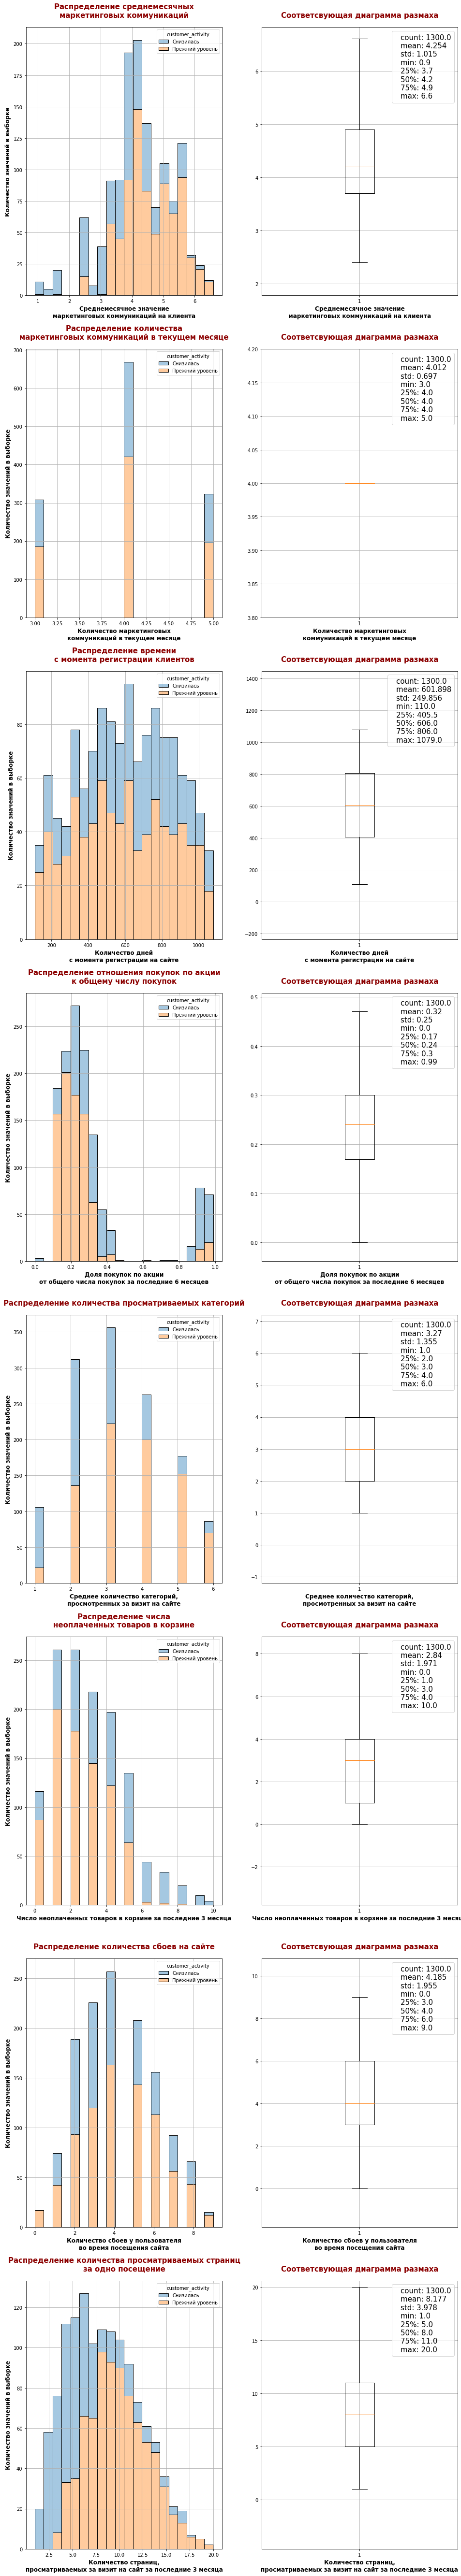

In [21]:
dmf_num_params = ['six_month_activity', 
              'present_month_activity', 
              'duration', 
              'six_month_promotional_ratio', 
              'average_category_view_per_visit', 
              'three_month_outstanding_products_amount', 
              'server_errors', 
              'three_month_average_pages']

dmf_num_mask = {'six_month_activity':('Среднемесячное значение\nмаркетинговых коммуникаций на клиента', 
                                      'Количество значений в выборке', 
                                      'Распределение среднемесячных\nмаркетинговых коммуникаций'), 
                'present_month_activity':('Количество маркетинговых\nкоммуникаций в текущем месяце', 
                                          'Количество значений в выборке', 
                                          'Распределение количества\nмаркетинговых коммуникаций в текущем месяце'), 
                'duration':('Количество дней\nс момента регистрации на сайте', 
                            'Количество значений в выборке', 
                            'Распределение времени\nс момента регистрации клиентов'), 
                'six_month_promotional_ratio':('Доля покупок по акции\nот общего числа покупок за последние 6 месяцев', 
                                               'Количество значений в выборке', 
                                               'Распределение отношения покупок по акции\nк общему числу покупок'), 
                'average_category_view_per_visit':('Среднее количество категорий,\nпросмотренных за визит на сайте', 
                                                   'Количество значений в выборке', 
                                                   'Распределение количества просматриваемых категорий'), 
                'three_month_outstanding_products_amount':('Число неоплаченных товаров в корзине за последние 3 месяца', 
                                                           'Количество значений в выборке', 
                                                           'Распределение числа\nнеоплаченных товаров в корзине'), 
                'server_errors':('Количество сбоев у пользователя\nво время посещения сайта', 
                                 'Количество значений в выборке', 
                                 'Распределение количества сбоев на сайте'), 
                'three_month_average_pages':('Количество страниц,\nпросматриваемых за визит на сайт за последние 3 месяца', 
                                             'Количество значений в выборке', 
                                             'Распределение количества просматриваемых страниц\nза одно посещение')}

show_hists(df=data_mrkt_file, 
           color_column='customer_activity',
           columns=dmf_num_params, 
           mask=dmf_num_mask, 
           bins=20)


<hr>

<p style='text-align: justify;'>По распределению среднемесячных маркетинговых коммуникаций, можно сделать вывод, что при значении <b>six_month_activity < 4</b>, покупательская активность клиента вероятнее всего снизится.<br><br>На графике распределения отношения покупок по акции к общему числу покупок имеются два пика, один из которых близок к единице, это говорит о том, что клиентов можно разбить на два типа: 
<br> - <b>Первый тип</b> - клиенты, которые почти всегда покупают продукцию только по акции, <b>six_month_promotional_ratio < 0.5</b>; 
<br> - <b>Второй тип</b> - клиенты, которые не часто обращают внимание на акции, <b>six_month_promotional_ratio > 0.8</b>;
<br><br>Также покупательская активность вероятнее всего снизится, если у клиента количество неоплаченных товаров в корзине будет <b>three_month_outstanding_products_amount > 5</b> за последние 3 месяца.<br><br>На графике распределения количества просматриваемых страниц видно, что распределение клиентов, чья покупательская активность снизилась, смещенно влево, что говорит о том, что чем меньше клиент просматривает страниц за один визит на сайт, тем больше вероятность, что его активность снизится.</p>

<hr>

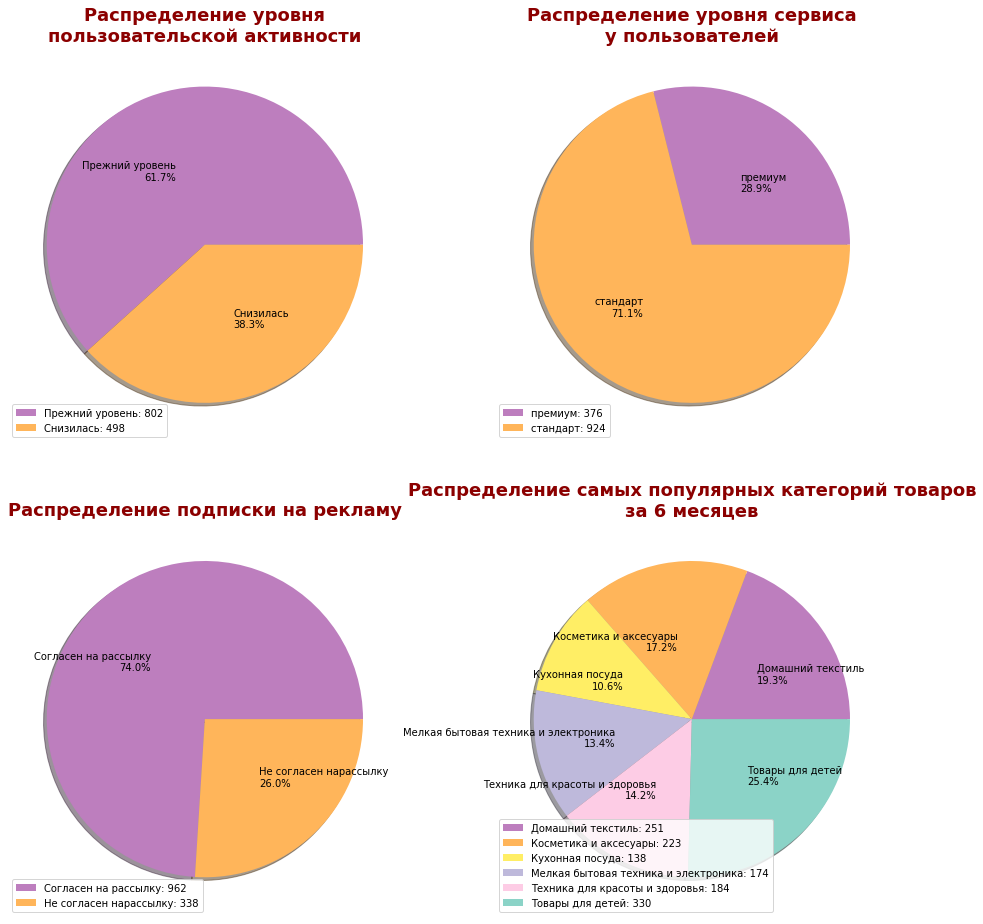

In [22]:
dmf_cat_params = ['customer_activity', 
                  'service_type', 
                  'report_permission', 
                  'popular_category']

dmf_cat_mask = {'customer_activity':('Распределение уровня\nпользовательской активности', None), 
                'service_type':('Распределение уровня сервиса\nу пользователей', None), 
                'report_permission':('Распределение подписки на рекламу', {'да':'Согласен на рассылку', 
                                                                           'нет':'Не согласен нарассылку'}), 
                'popular_category':('Распределение самых популярных категорий товаров\nза 6 месяцев', None), }

show_pie_plots(df=data_mrkt_file, 
               columns=dmf_cat_params, 
               labeldistance=0.5, 
               in_row=2, 
               figsize=(16, 16), 
               mask=dmf_cat_mask)

<hr>

Целевой признак - <b>пользовательская активность</b>, имеет дисбаланс классов. В выборке предсатвлено 62% клиентов, которые сохранили уровень своей пользовательской активности и 38% клиентов, чей уровень снизился.

В 71% случаев, в представленной выборке, у клиента стандартный уровень сервиса и 29% клиентов имеют премиум уровень сервиса.

Клиенты в 74% случаев соглашаются на рекламную рассылку.

В перечень самых популярных категорий товаров за последние 6 месяцев вошли следующие категории (расположены в порядке убывания популярности):
 - Товары для детей;
 - Домашний текстиль;
 - Косметика и аксесуары;
 - Техника для красоты и здоровья;
 - Мелкая бытовая техника и электроника;
 - Кухонная посуда;

<hr>

<hr>

<div align='center'><font size=4>Фрейм <b>data_mrkt_money</b></font></div>

Построим аналогичные графики для признаков из этого фрейма.
 
<hr>

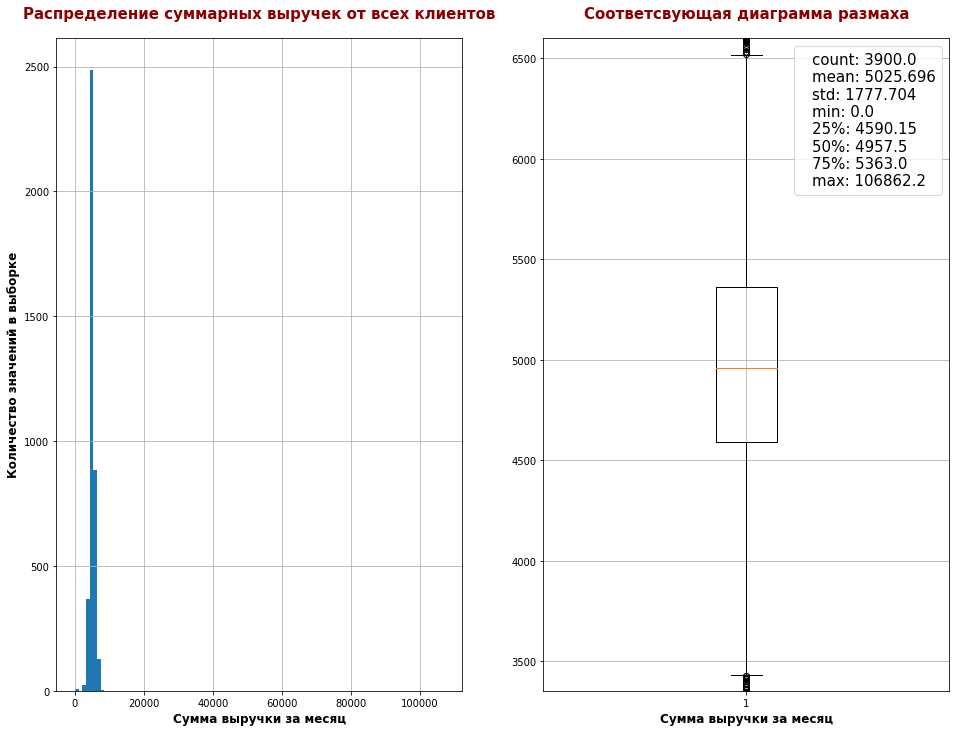

In [23]:
dmm_num_params = ['revenue']

dmm_num_mask = {'revenue':('Сумма выручки за месяц', 
                           'Количество значений в выборке', 
                           'Распределение суммарных выручек от всех клиентов')}

show_hists(df=data_mrkt_money, 
           columns=dmm_num_params,
           mask=dmm_num_mask, 
           bins=100)

<hr>

На гистограмме наблюдается очень высокие значения, посмотрим, сколько встречается значений больше 20 000. 

<hr>

In [24]:
data_mrkt_money.loc[data_mrkt_money['revenue'] > 20000, :]

,id,period,revenue
98,215380,текущий_месяц,106862.2


<hr>

Только одно значение. Даже если это не ошибка и человек действительно потратил более 100 000 за месяц, такое значение встречается всего один раз, не получится использовать его для поиска подобных высокоприбыльных клиентов, поэтому просто уберем его из выборки. Ипостроим гистограмму снова.

<hr>

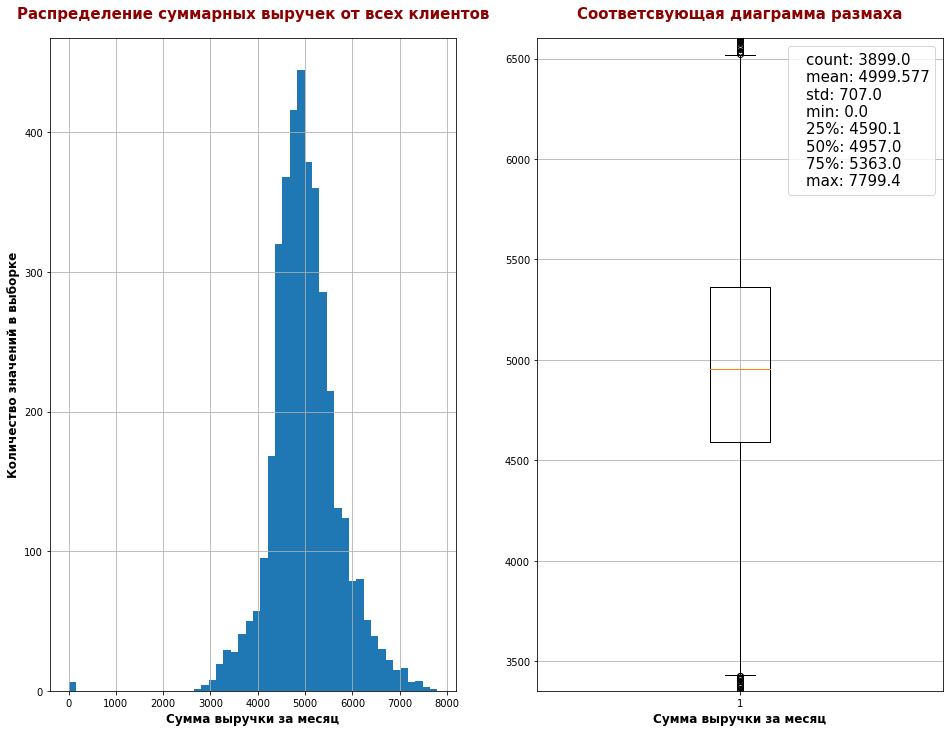

In [25]:
data_mrkt_money = data_mrkt_money.loc[data_mrkt_money['revenue'] < 20000, :]
data_mrkt_file = data_mrkt_file.loc[data_mrkt_file['id'] != 215380, :]

show_hists(df=data_mrkt_money, 
           columns=dmm_num_params,
           mask=dmm_num_mask, 
           bins=50)

<hr>

График имеет вид нормального распределения. В выборке встречаются клиенты, которые в какие-то месяцы ничего не купили. Рассмотрим их детальнее. 

<hr>

In [26]:
data_mrkt_money.loc[data_mrkt_money['revenue'] == 0, :]

,id,period,revenue
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


<hr>

Клиентов с нулевой выручкой за прошлый и позапрошлый месяцы - 3. Такие клиенты не помогут определеить активность клиента на текущий месяц, удалим их из выборки.

<hr>

In [27]:
data_mrkt_file = data_mrkt_file.loc[(data_mrkt_file['id'] != 215348) & 
                                    (data_mrkt_file['id'] != 215357) & 
                                    (data_mrkt_file['id'] != 215359), :]

In [28]:
data_mrkt_file.shape

(1296, 13)

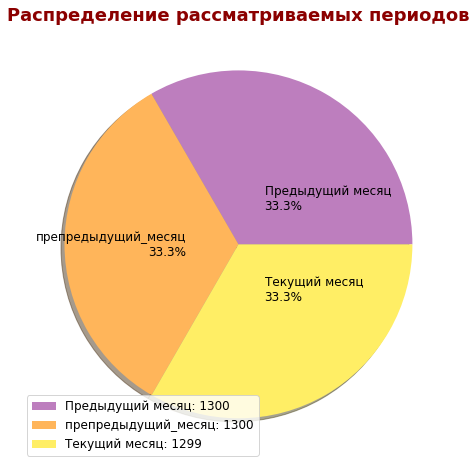

In [29]:
dmm_cat_params = ['period']

dmm_cat_mask = {'period':('Распределение рассматриваемых периодов', {'предыдущий_месяц':'Предыдущий месяц', 
                                                                     'текущий_месяц':'Текущий месяц'})}

show_pie_plots(df=data_mrkt_money, 
               columns=dmm_cat_params, 
               labeldistance=0.3, 
               in_row=1, 
               figsize=(8, 8), 
               mask=dmm_cat_mask,
               textsize=12)

<hr>

В выборке, с информацие о рассматриваемых периодах за которые рассчитывается выручка, представленны данные в равных пропорциях.

<hr>

<hr>

<div align='center'><font size=4>Фрейм <b>data_mrkt_time</b></font></div>

 
<hr>

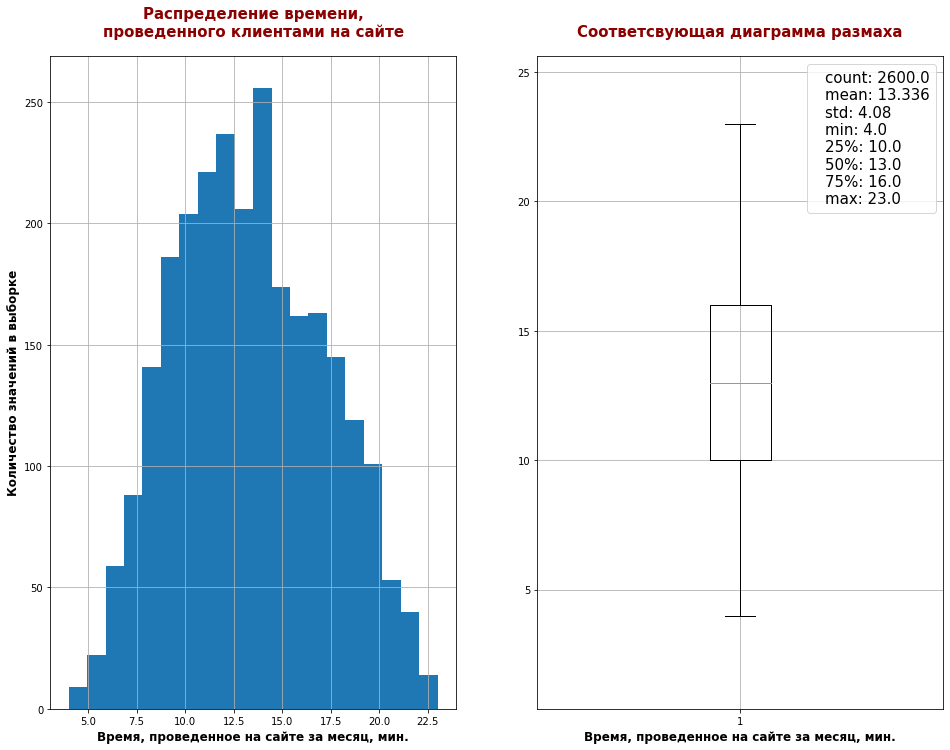

In [30]:
dmt_num_params = ['minutes']

dmt_num_mask = {'minutes':('Время, проведенное на сайте за месяц, мин.', 
                           'Количество значений в выборке', 
                           'Распределение времени,\nпроведенного клиентами на сайте')}

show_hists(df=data_mrkt_time, 
           columns=dmt_num_params, 
           mask=dmt_num_mask, 
           bins=20)


<hr>

График распределения времени, которое клиент проводит на сайте, имеет вид нормального распределения.

<hr>

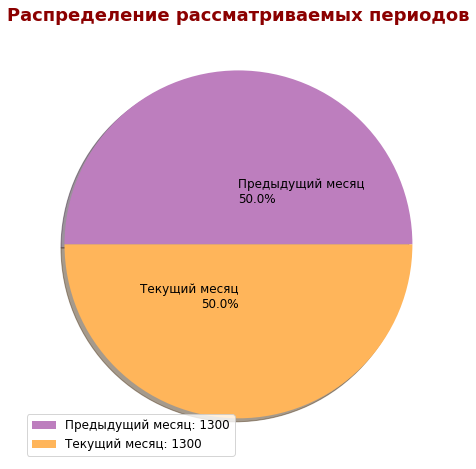

In [31]:
dmt_cat_params = ['period']

dmt_cat_mask = {'period':('Распределение рассматриваемых периодов', {'предыдущий_месяц':'Предыдущий месяц', 
                                                                     'текущий_месяц':'Текущий месяц'})}

show_pie_plots(df=data_mrkt_time, 
               columns=dmt_cat_params, 
               labeldistance=0.3, 
               in_row=1, 
               figsize=(8, 8), 
               mask=dmt_cat_mask,
               textsize=12)

<hr>

В фрейме, с информацией о времени (в минутах), которое покупатель провёл на сайте в течение периода, представленны данные за предыдущий и текущий месяцы в равной пропорции.

<hr>

<hr>

<div align='center'><font size=4>Фрейм <b>data_money</b></font></div>

 
<hr>

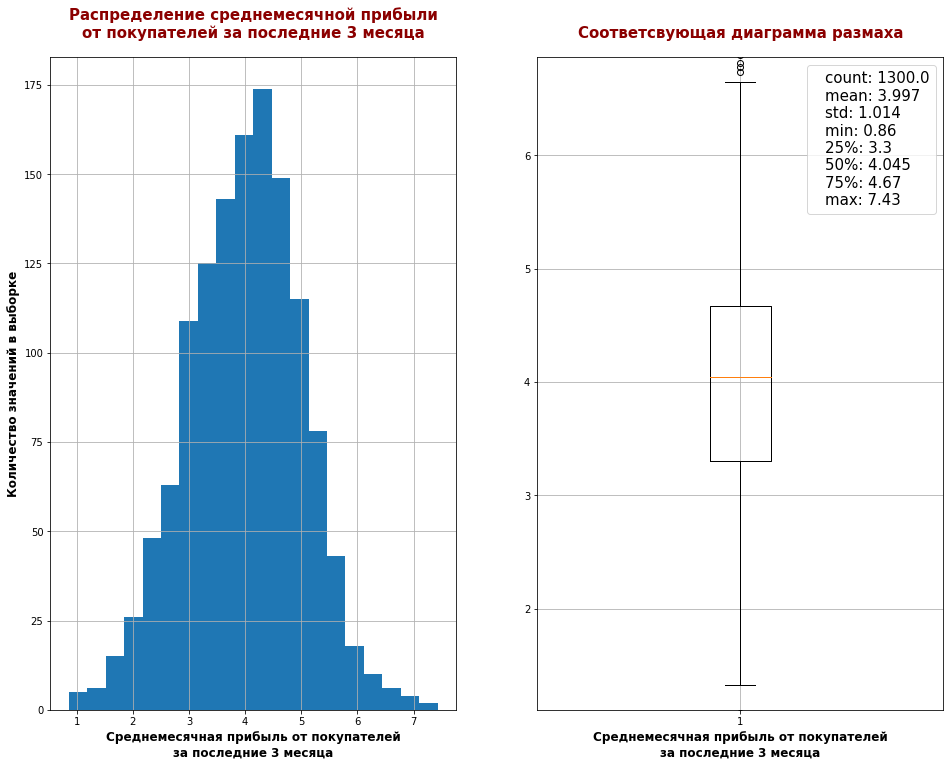

In [32]:
dm_num_params = ['profit']

dm_num_mask = {'profit':('Среднемесячная прибыль от покупателей\nза последние 3 месяца', 
                         'Количество значений в выборке', 
                         'Распределение среднемесячной прибыли\nот покупателей за последние 3 месяца')}

show_hists(df=data_money, 
           columns=dm_num_params, 
           mask=dm_num_mask, 
           bins=20)

<hr>

<p style='text-align: justify;'>Значение прибыли за 3 месяца вероятнее всего представленны в тысячах, так как ранее рассматривалась выручка от клиента за предыдущие 3 месяца, где среднее значение выручки составляло примерно 5 тысяч, следовательно среднемесячная прибыль скорее всего также указана в тысячах. График распределения прибыли от покупателей за последние 3 месяца имеет вид нормального распределения.

<hr>

<hr>

<p style='text-align: justify;'>Объединим данные из фреймов <b>data_mrkt_file</b>, <b>data_mrkt_money</b> и <b>data_mrkt_time</b> и соберем их в один файл <b>data</b>. Для начала создадим два новых фрейма на основе <b>data_mrkt_money</b> и <b>data_mrkt_time</b>, в которых будут три столбца <i>id</i>, <i>current_month_(revenue/time)</i> и <i>previous_month_(revenue/time)</i>, в которых соответственно будет указана выручка / время на сайте за текущий и прошлый месяц.</p> 

<hr>

In [33]:
data_mrkt_money['befor_last_month_revenue'] = data_mrkt_money.apply(
    lambda row: row['revenue'] if row['period'] == 'препредыдущий_месяц' else 0, axis=1)

data_mrkt_money['previous_month_revenue'] = data_mrkt_money.apply(
    lambda row: row['revenue'] if row['period'] == 'предыдущий_месяц' else 0, axis=1)

data_mrkt_money['current_month_revenue'] = data_mrkt_money.apply(
    lambda row: row['revenue'] if row['period'] == 'текущий_месяц' else 0, axis=1)

money_to_merge = data_mrkt_money.pivot_table(index='id', 
                                             values=['befor_last_month_revenue', 
                                                     'previous_month_revenue', 
                                                     'current_month_revenue'], 
                                             aggfunc='sum').reset_index()
money_to_merge.head()

,id,befor_last_month_revenue,current_month_revenue,previous_month_revenue
0,215348,0.0,3293.1,0.0
1,215349,4472.0,4971.6,5216.0
2,215350,4826.0,5058.4,5457.5
3,215351,4793.0,6610.4,6158.0
4,215352,4594.0,5872.5,5807.5


In [34]:
data_mrkt_time['previous_month_time'] = data_mrkt_time.apply(
    lambda row: row['minutes'] if row['period'] == 'предыдущий_месяц' else 0, axis=1)

data_mrkt_time['current_month_time'] = data_mrkt_time.apply(
    lambda row: row['minutes'] if row['period'] == 'текущий_месяц' else 0, axis=1)

time_to_merge = data_mrkt_time.pivot_table(index='id', 
                                           values=['previous_month_time', 'current_month_time'], 
                                           aggfunc='sum').reset_index()
time_to_merge.head()

,id,current_month_time,previous_month_time
0,215348,14,13
1,215349,10,12
2,215350,13,8
3,215351,13,11
4,215352,11,8


<hr>

Теперь объединим все данные в один фрем <b>data</b>.

<hr>

In [35]:
data = data_mrkt_file.merge(money_to_merge, how='left', on='id')
data = data.merge(time_to_merge, how='left', on='id')
data.head()

,id,customer_activity,service_type,report_permission,six_month_activity,present_month_activity,duration,six_month_promotional_ratio,popular_category,average_category_view_per_visit,three_month_outstanding_products_amount,server_errors,three_month_average_pages,befor_last_month_revenue,current_month_revenue,previous_month_revenue,current_month_time,previous_month_time
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,4971.6,5216.0,10,12
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5058.4,5457.5,13,8
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6610.4,6158.0,13,11
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5872.5,5807.5,11,8
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,5388.5,4738.5,10,10


In [36]:
data.shape

(1296, 18)

<hr>
<font size=4.5><b>Итоги раздела:</b></font>
<br><br>
Портрет клиента интернет-магазина <b>«В один клик»</b>, активность которого вероятнее всего снизится:

 - Среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев <b>six_month_activity</b> менее 4;
 - Количество неоплаченных товаров в корзине за последние 3 месяца <b>three_month_outstanding_products_amount</b> более 5;
 - Среднее количество просматриваемых страниц за один визит <b>three_month_average_pages</b> менее 5;
 
<p style='text-align: justify;'>В результате исследования удалены 4 клиента из выборки, три из которых были с нулевой покупательской активностью за предыдущие 2 месяца и один с аномально высоким значением выручки за месяц. Данные объединены в один фрейм <b>data</b> далее будем работать с ним.</p>

<hr>

 <a id='corr_analysis'></a>

## Корреляционный анализ

In [37]:
def cor_heatmap(df: pd.DataFrame, parameters: list[str], 
                kind: str = 'Spearman', n_round: int=2,
                figsize: tuple[int] = (10, 10)) -> None:
    '''Heatmap of the correlation matrix (df[parameters])'''
    
    if kind == 'Phik':
        types = df.dtypes.reset_index()
        types.columns = ['index', 'type']
        quantitive = list(types.loc[(types['type'] == 'int64') | (types['type'] == 'float64'), 'index'])
        data_corr = df[parameters].phik_matrix(quantitive)
    elif kind == 'Pearson':
        data_corr = df[parameters].corr()
    elif kind == 'Spearman':
        data_corr = df[parameters].corr(method='spearman')
    plt.figure(figsize=figsize)
    mask = np.triu(np.ones_like(data_corr, dtype=bool))
    sns.heatmap(data_corr, 
                annot=True, 
                cmap='coolwarm',
                mask=mask,
                fmt=f".{n_round}f", 
                vmin=-1, 
                vmax=1, 
                center=0) 
    plt.title(f'Матрица корреляций, использующая метод {kind}', 
                 weight='bold', 
                 size=15, 
                 color='darkred', 
                 pad=20)
    plt.show()

<hr>

Построим матрицу с коэффициентами корреляции Фи.

<hr>

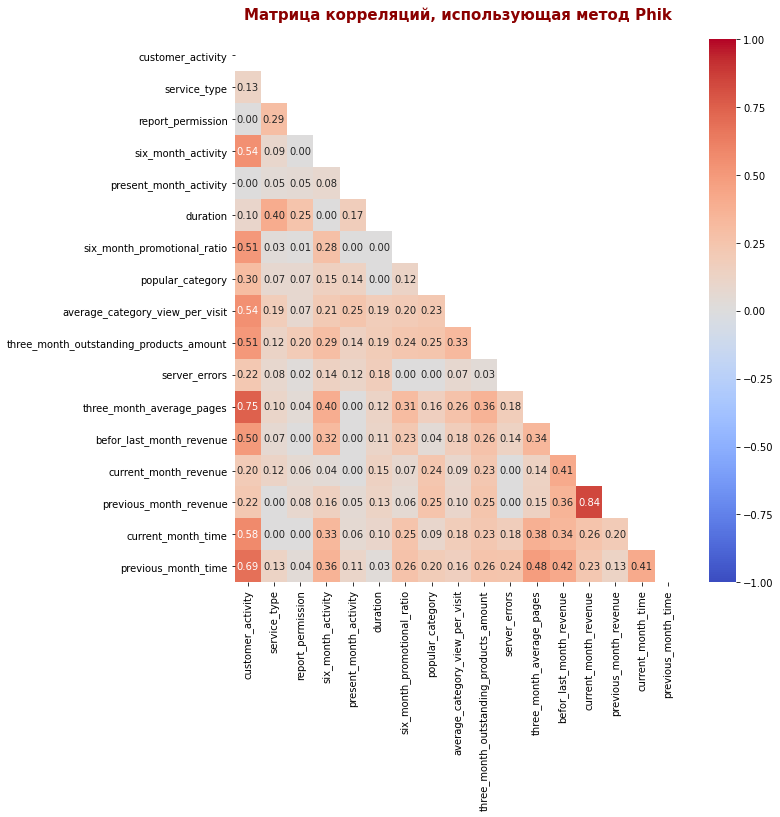

In [38]:
cor_heatmap(data, 
            data.columns.drop('id'), 
            kind='Phik')

<hr>
<font size=4.5><b>Итоги раздела:</b></font>

<p style='text-align: justify;'>Значения коэффициентов корреляции не превышают 0.9, в данных не наблюдается мультиколлинеарность.</p>

<hr>

 <a id='section_5'></a>

## Использование пайплайнов

<hr>

Выделим тренировочную и тестовую выборки.


In [39]:
RANDOM_STATE = 1
TEST_SIZE = 0.25

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['id', 'customer_activity'], axis=1), 
                                                    data['customer_activity'], 
                                                    test_size=TEST_SIZE, 
                                                    random_state=RANDOM_STATE, 
                                                    stratify=data['customer_activity'])

<hr>

Создадим списки со столбцами, в которых находятся категориальные признаки и количественные. Далее приступим к созданию пайплайнов:
 
<p style='text-align: justify;'><br>1. Создадим пайплайн для кодирования категориальных признаков при помощи <b>OneHotEncoder</b>.
<br>2. Создадим пайплайн для кодирования категориальных признаков при помощи <b>OrdinalEncoder</b>.
<br>3. Соберем процесс кодирования в объекте <b>ColumnTransformer</b>, в нем же будем масштабировать количественные признаки.
<br>4. Создадим финальный пайплайн, в котором к моделям будут применяться различные комбинации кодировщиков и масштабирования.
<br>5. Создадим список словарей, в которых будут указаны модели и соотвтетствующие для них гиперпараметры, изменяющиеся в некотором диапазоне. Диапазон будем  орпределять при помощи специальных объектов из модуля <b>Optuna</b> для корректной работы <b>OptunaSearchCV</b>. Во всех моделях для масштабирования будем применять <b>StandardScaler</b> и <b>MinMaxScaler</b>, а для кодирования <b>OneHotEncoder</b> и <b>OrdinalEncoder</b>.
<br><br>&emsp;5.1. В первом словаре соберем гиперпараметры для модели <b>DecisionTreeClassifier</b>, максимальную глубину дерева будем изменять в диапазоне [5, 15]; минимальное количество объектов для разделения изменим в диапазоне [2, 8]; максимальное количество входных признаков изменим в диапазоне [5, 15]. 
<br>&emsp;5.2. Во втором словаре соберем гиперпараметры для модели <b>KNeighborsClassifier</b>, будем изменять количество ближайших соседей, по которым будет проиходить классификация, в диапазоне [6, 15]. 
<br>&emsp;5.3. В третьем словаре соберем гиперпараметры для модели <b>LogisticRegression</b>, выберем лассо-регуляризацию 'l1' и будем изменять силу регуляризации в диапазоне [1, 8]. 
<br>&emsp;5.4. В четвертом словаре соберем гиперпараметры для модели <b>SVC</b>, будем использовать полиномиальное ядро со степенью, изменяющуюся в диапазоне [2, 10]. 
<br><br>
6. Пройдемся циклом по списку словарей и будем передавать их в <b>OptunaSearchCV</b> в качестве гиперпараметров для моделей. Предварительно выключим отображение логов. В конце каждого цикла будем сохранять результаты в соотвтетсвующие переменные. 
<br><br>В качестве метрики будем использовать <b>f1</b>, так как нам необходимо не только добиться результатов, когда модель не пропускает клиентов, у которых снизилась покупательская активность, но и не допустить, чтобы клиентам, чья покупательская активность будет нормальной (не сниженной), предлогались товары по заниженной цене, чтобы не терять прибыль.</p>

<hr>

In [41]:
cat_columns = ['service_type', 
               'report_permission', 
               'popular_category']

num_columns = ['six_month_activity', 
               'present_month_activity', 
               'duration', 
               'six_month_promotional_ratio', 
               'average_category_view_per_visit', 
               'three_month_outstanding_products_amount', 
               'server_errors', 
               'three_month_average_pages', 
               'befor_last_month_revenue',
               'current_month_revenue', 
               'previous_month_revenue', 
               'current_month_time', 
               'previous_month_time']

In [42]:
ohe_pipe = Pipeline([('ohe', OneHotEncoder(drop='first', 
                                           sparse=False))])

ord_pipe = Pipeline([('ord', OrdinalEncoder(handle_unknown='use_encoded_value', 
                                            unknown_value=np.nan)), 
                     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, 
                                                              strategy='most_frequent'))])


data_preprocessor = ColumnTransformer([('cat', ohe_pipe, cat_columns), 
                                       ('num', StandardScaler(), num_columns)], 
                                      remainder='passthrough')

pipe_final = Pipeline([('preprocessor', data_preprocessor), 
                       ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))])


In [43]:
param_distribution = [{
                          'models':distributions.CategoricalDistribution([DecisionTreeClassifier(random_state=RANDOM_STATE)]), 
                          'models__max_depth':distributions.IntDistribution(5, 15), 
                          'models__min_samples_split':distributions.IntDistribution(2, 8), 
                          'models__max_features':distributions.IntDistribution(5, 15), 
                          'preprocessor__num':distributions.CategoricalDistribution([StandardScaler(), MinMaxScaler()]), 
                          'preprocessor__cat':distributions.CategoricalDistribution([ohe_pipe, ord_pipe])
                      },
                      {
                          'models':distributions.CategoricalDistribution([KNeighborsClassifier()]), 
                          'models__n_neighbors':distributions.IntDistribution(6, 15), 
                          'preprocessor__num':distributions.CategoricalDistribution([StandardScaler(), MinMaxScaler()]), 
                          'preprocessor__cat':distributions.CategoricalDistribution([ohe_pipe, ord_pipe])
                      },
                      {
                          'models':distributions.CategoricalDistribution([LogisticRegression(random_state=RANDOM_STATE, 
                                                                                          solver='saga', 
                                                                                          penalty='l1')]), 
                          'models__C':distributions.IntDistribution(1, 8), 
                          'preprocessor__num':distributions.CategoricalDistribution([StandardScaler(), MinMaxScaler()]), 
                          'preprocessor__cat':distributions.CategoricalDistribution([ohe_pipe, ord_pipe])
                      },
                      {
                          'models':distributions.CategoricalDistribution([SVC(random_state=RANDOM_STATE, 
                                                                              kernel='poly', 
                                                                              probability=True,)]), 
                          'models__degree':distributions.IntDistribution(2, 10), 
                          'preprocessor__num':distributions.CategoricalDistribution([StandardScaler(), MinMaxScaler()]), 
                          'preprocessor__cat':distributions.CategoricalDistribution([ohe_pipe, ord_pipe])
                      }]

optuna_logger = logging.getLogger('optuna')
optuna_logger.setLevel(logging.WARNING)
# optuna_logger.setLevel(logging.INFO)


models = ['decision_tree', 'k_neighbors', 'log_reg', 'svc']
for distr, model in zip(param_distribution, models):
    globals()[model] = OptunaSearchCV(pipe_final, 
                                      distr, 
                                      random_state=RANDOM_STATE, 
                                      scoring='f1_weighted',  
                                      n_trials=25, 
                                      cv=5)
    
    globals()[model].fit(X_train, y_train);

In [44]:
models = [decision_tree, k_neighbors, log_reg, svc]
for model in models:
    model_name = model.trials_dataframe().sort_values('value', 
                                                      ascending=False).reset_index(drop=True).loc[0, 'params_models']
    test_score = f1_score(y_test, model.predict(X_test), pos_label='Снизилась')
    
    print(f"\033[92m\033[1mМодель {str(model_name).split('(')[0]}\033[0m".center(140))
    print(f'Лучшая метрика f1 при валидации: {round(model.best_score_, 3)}')
    if test_score > model.best_score_:
        print(f"Метрика f1 на тестовых данных: \033[32m{round(test_score, 3)}\033[0m", end='\n\n')
    else:
        print(f"Метрика f1 на тестовых данных: \033[31m{round(test_score, 3)}\033[0m", end='\n\n')

                                                 Модель DecisionTreeClassifier                                                 
Лучшая метрика f1 при валидации: 0.866
Метрика f1 на тестовых данных: 0.791

                                                  Модель KNeighborsClassifier                                                  
Лучшая метрика f1 при валидации: 0.877
Метрика f1 на тестовых данных: 0.795

                                                   Модель LogisticRegression                                                   
Лучшая метрика f1 при валидации: 0.878
Метрика f1 на тестовых данных: 0.814

                                                          Модель SVC                                                           
Лучшая метрика f1 при валидации: 0.885
Метрика f1 на тестовых данных: 0.814



<hr>
<font size=4.5><b>Итоги раздела:</b></font>

<p style='text-align: justify;'>В результате подбора и обучения моделей были получены четыре различные модели с наилучшими метриками при кросс-валидации, среди всех моделей лучшая метрика получилась у <b>SVC</b> модели, равная 0.885. При предсказании на тестовой выборке, лучший реультат показали модели <b>SVC</b> и <b>LogisticRegression</b>, с метрикой <i>f1</i> равной 0.814, будем считать модель <b>LogisticRegression</b> лучшей из всех.</p>

<hr>

 <a id='section_6'></a>

## Анализ важности признаков

<hr>

Построим графики важности с помощью метода <b>SHAP</b>.

<hr>

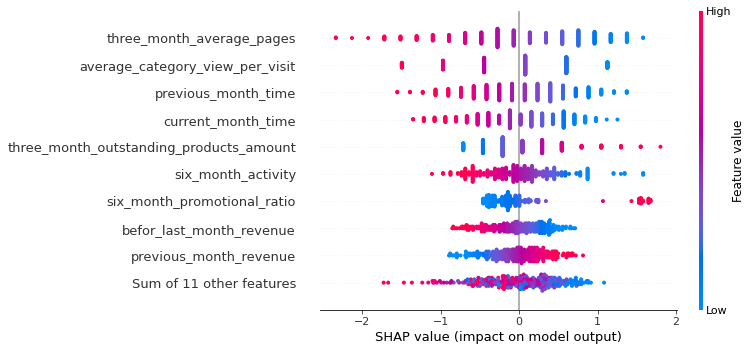

In [45]:
best_model = log_reg.best_estimator_.named_steps['models']
preprocessor = log_reg.best_estimator_.named_steps['preprocessor']

X_test_preprocessed = preprocessor.transform(X_test)

cat_features = preprocessor.named_transformers_['cat']['ohe'].get_feature_names()
num_features = preprocessor.transformers_[1][2]
feature_names = np.hstack([cat_features, num_features])

X_test_preprocessed = pd.DataFrame(X_test_preprocessed, columns=feature_names)

explainer = shap.LinearExplainer(best_model, X_test_preprocessed)
shap_values = explainer(X_test_preprocessed)

shap.plots.beeswarm(shap_values) 

<hr>

Из графика следует, что к классу 0 - <b>Прежний уровень активности клиента</b>, больше всего склоняют признаки:
 - <b>three_month_average_pages</b> — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца;
 - <b>average_category_view_per_visit</b> — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца;
 - <b>previous_month_time</b> - значение времени, проведённого на сайте, в минутах за предыдущий месяц;
 - <b>current_month_time</b> - значение времени, проведённого на сайте, в минутах за текущий месяц; 
 - <b>six_month_activity</b> — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев;
 - <b>befor_last_month_revenue</b> - значение прибыли за позапрошлый месяц;
 
К классу 1 - <b>Активность клиента снизилась</b>, больше всего склоняют признаки:
 - <b>three_month_outstanding_products_amount</b> — среднее количество неоплаченных товаров в корзине за последние 3 месяца;
 - <b>six_month_promotional_ratio</b> — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев;
 - <b>previous_month_revenue</b> - Занчение прибыли за прошлый месяц;
 
Остальные признаки влияют на целевой признак в меньшей степени. 
<hr>

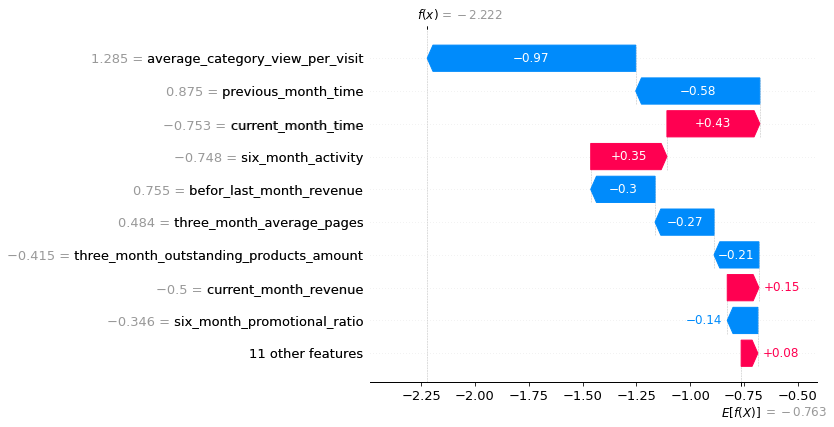

In [46]:
shap.plots.waterfall(shap_values[5]) 

<hr>

На этом графике можно увидеть, на сколько влияют SHAP-значения на одного из клиентов. Больший вклад вносит признак <b>average_category_view_per_visit</b>, определяя клиенту класс 0 - прежний уровень.

<hr>

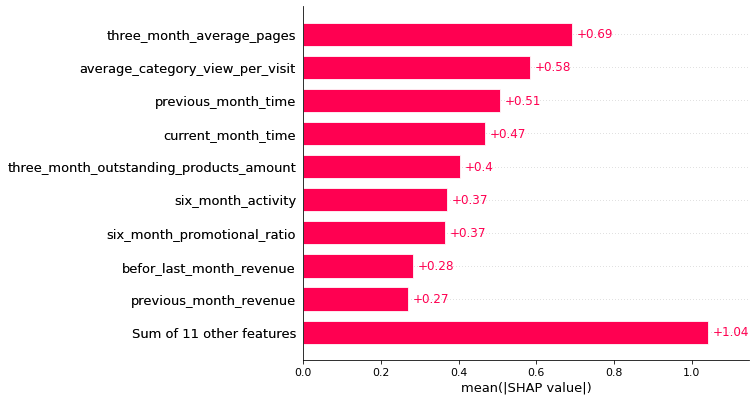

In [47]:
shap.plots.bar(shap_values) 

<hr>

На этом графике показаны средние SHAP-значения признаков, которые вносят наибольший вклад в определении класса.

<hr>

<hr>
<font size=4.5><b>Итоги раздела:</b></font>


Из графика следует, что к классу 0 - <b>Прежний уровень активности клиента</b>, больше всего склоняют признаки:
 - <b>three_month_average_pages</b> — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца;
 - <b>average_category_view_per_visit</b> — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца;
 - <b>previous_month_time</b> - значение времени, проведённого на сайте, в минутах за предыдущий месяц;
 - <b>current_month_time</b> - значение времени, проведённого на сайте, в минутах за текущий месяц; 
 - <b>six_month_activity</b> — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев;
 - <b>befor_last_month_revenue</b> - значение прибыли за позапрошлый месяц;
 
К классу 1 - <b>Активность клиента снизилась</b>, больше всего склоняют признаки:
 - <b>three_month_outstanding_products_amount</b> — среднее количество неоплаченных товаров в корзине за последние 3 месяца;
 - <b>six_month_promotional_ratio</b> — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев;
 - <b>previous_month_revenue</b> - Занчение прибыли за прошлый месяц;
 
Остальные признаки влияют на целевой признак в меньшей степени.


<p style='text-align: justify;'>Полученные зависимости могут помочь определить, на какие признаки стоит обращать больше внимания для удержания клиентов. Например высокое значение в параметре <b>six_month_promotional_ratio</b> говорит о высокой вероятности того, что покупательская активность клиента <i>снизится</i>. Ранее было выявлены две группы клиентов: клиенты, которые покупают товары в основном по акции, и клиенты, которые не часто обращают внимание на акции, это говорит о том, что активность клиентов из первой группы с большей степенью вероятности снизится. Возможно для таких клиентов стоит чаще предлагать товары по акциям, чтобы сохранять их покупательскую активность.<br><br>Высокое значение в параметре <b>six_month_activity</b> говорит о высокой вероятности того, что покупательская активность клиента <i>не снизится</i>. Это может значить, что важно следить за высоким среднемесячным значением маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев.</p>

<hr>

 <a id='section_7'></a>

## Сегментация покупателей

In [48]:
def line_plot(df: pd.DataFrame, x: str, y: str, 
              ax: plt.Axes=None, figsize: tuple[int]=(8, 8), 
              title: str = None, xlabel: str = None, ylabel: str = None) -> None:
    '''Creation lineplot'''
    
    if not ax:
        fig, ax = plt.subplots(figsize=figsize)
    sns.lineplot(data=df, x=x, y=y)
    ax.set_title(title, 
                 size=15, 
                 weight='bold', 
                 pad=20, 
                 color='DarkRed')
    ax.set_xlabel(xlabel, 
                  size=12,
                  weight='bold')
    ax.set_ylabel(ylabel, 
                  size=12,
                  weight='bold')
    ax.grid()

In [49]:
def line_plots(df: pd.DataFrame, x: str, columns: list[str], 
              mask: dict[str]=dict()) -> None:
    '''Creation Linear plots'''
    
    fig = plt.figure(figsize=(16, math.ceil(len(columns) / 2) * 12))
    for i in range(len(columns)):
        if len(columns) == 1:
            ax = fig.add_subplot(1, 1, 1)
        else:
            ax = fig.add_subplot(math.ceil(len(columns) / 2), 2, i+1)
        xlabel = mask.setdefault(columns[i], ('X_label', 'Y_label', 'Title'))[0]
        ylabel = mask.setdefault(columns[i], ('X_label', 'Y_label', 'Title'))[1]
        title = mask.setdefault(columns[i], ('X_label', 'Y_label', 'Title'))[2]
        line_plot(df=df, 
                  x=x, 
                  y=columns[i], 
                  ax=ax, 
                  title=title, 
                  xlabel=xlabel, 
                  ylabel=ylabel)

In [50]:
def scatter_plot(df: pd.DataFrame, column: str, target: str, color_column: str=None,
                 alpha: float = 0.4, ax: plt.Axes=None, figsize: tuple[int]=(8, 8),
                 title: str = None, xlabel: str = None, ylabel: str = None) -> None:
    '''Creation scatter plots'''
    
    if not ax:
        fig, ax = plt.subplots(figsize=figsize)
        
    sorted_data = df.sort_values(target)
    sns.scatterplot(data=df,
                    x=sorted_data[target],
                    y=sorted_data[column], 
                    hue=color_column,
                    alpha=alpha, 
                    ax=ax)
    ax.set_title(title, 
                 size=15, 
                 weight='bold', 
                 pad=20, 
                 color='DarkRed')
    ax.set_xlabel(xlabel, 
                  size=12,
                  weight='bold')
    ax.set_ylabel(ylabel, 
                  size=12,
                  weight='bold')
    ax.grid()

In [51]:
def show_scatters(df: pd.DataFrame, columns: list[str], 
                  target: str, alpha: float = 0.4,
                  color_column: str = None, in_row: int = 1,
                  mask: dict[str]=dict()) -> None:
    '''Designed to display scatters'''
    
    fig, axes = plt.subplots(math.ceil(len(columns) / in_row), in_row, 
                             figsize=(16, math.ceil(len(columns) / in_row) * 12))
    for i in range(len(columns)):
        xlabel = mask.setdefault(columns[i], ('X_label', 'Y_label', 'Title'))[0]
        ylabel = mask.setdefault(columns[i], ('X_label', 'Y_label', 'Title'))[1]
        title = mask.setdefault(columns[i], ('X_label', 'Y_label', 'Title'))[2]
        if len(columns) == 1:
            ax = axes
        elif in_row == 1:
            ax = axes[i]
        else:
            ax = axes[(i) // in_row, (i) % in_row]
        scatter_plot(df=df, 
                     column=columns[i],
                     target=target,
                     color_column=color_column,
                     xlabel=xlabel, 
                     ylabel=ylabel,
                     title=title, 
                     alpha=alpha, 
                     ax=ax)
        

<hr>

<p style='text-align: justify;'>Выполним сегментацию покупателей. Определим группу клиентов с высокой долей покупок по акции и высокой вероятностью снижения покупательской активности. Для этого соберем в один фрейм информацию о клиентах из тестовой выборки, добавим к ним столбец <b>predictions</b>, в котором будут результаты предсказаний модели. Далее выделим клиентов, у которых значение <b>six_month_promotional_ratio</b> больше 0.8.</p>

<hr>

In [52]:
test_data = data.loc[X_test.index, :]
test_data.insert(1, 'predictions', log_reg.predict(X_test))
test_data.head()

,id,predictions,customer_activity,service_type,report_permission,six_month_activity,present_month_activity,duration,six_month_promotional_ratio,popular_category,average_category_view_per_visit,three_month_outstanding_products_amount,server_errors,three_month_average_pages,befor_last_month_revenue,current_month_revenue,previous_month_revenue,current_month_time,previous_month_time
1028,216380,Прежний уровень,Прежний уровень,стандарт,да,5.7,3,286,0.13,Мелкая бытовая техника и электроника,6,5,2,8,4400.0,5179.6,4748.0,11,9
693,216045,Прежний уровень,Прежний уровень,стандарт,да,5.6,5,190,0.15,Домашний текстиль,3,3,3,17,5109.0,5320.2,5152.5,11,13
326,215678,Прежний уровень,Снизилась,стандарт,да,5.2,4,205,0.11,Техника для красоты и здоровья,2,3,2,5,4876.0,5055.7,5252.0,16,19
465,215817,Прежний уровень,Снизилась,стандарт,да,3.3,4,320,0.28,Домашний текстиль,5,4,3,13,5444.0,6509.2,5945.0,10,16
509,215861,Прежний уровень,Прежний уровень,стандарт,да,4.5,4,908,0.13,Товары для детей,5,4,5,7,4904.0,5002.0,4664.0,14,8


In [53]:
high_promo_ratio_customers = test_data.loc[test_data['six_month_promotional_ratio'] > 0.8, :]
high_promo_ratio_customers.head()

,id,predictions,customer_activity,service_type,report_permission,six_month_activity,present_month_activity,duration,six_month_promotional_ratio,popular_category,average_category_view_per_visit,three_month_outstanding_products_amount,server_errors,three_month_average_pages,befor_last_month_revenue,current_month_revenue,previous_month_revenue,current_month_time,previous_month_time
13,215364,Снизилась,Снизилась,премиум,да,4.3,4,708,0.98,Домашний текстиль,3,3,3,3,4942.0,5484.8,5795.5,9,11
490,215842,Снизилась,Снизилась,премиум,да,4.3,3,1036,0.94,Товары для детей,4,2,3,9,4642.0,4740.8,4408.0,10,8
318,215670,Снизилась,Снизилась,стандарт,да,4.1,4,490,0.98,Кухонная посуда,3,7,3,2,4563.0,5723.1,5415.0,11,9
48,215400,Снизилась,Снизилась,стандарт,нет,4.4,5,304,0.94,Товары для детей,1,4,3,2,4439.0,5691.4,5681.0,9,11
56,215408,Снизилась,Снизилась,премиум,да,2.4,3,666,0.98,Кухонная посуда,3,5,1,2,4434.0,5029.8,5295.0,12,10


<hr>

Построим графики зависимостей целевого признака от других. Не будем учитывать признаки, характеризующие текущий месяц, чтобы не возникало утечки данных.

<hr>

In [54]:
num_params = ['six_month_activity', 
              'duration', 
              'six_month_promotional_ratio', 
              'average_category_view_per_visit', 
              'three_month_outstanding_products_amount', 
              'server_errors', 
              'three_month_average_pages',
              'previous_month_revenue', 
              'previous_month_time']

num_mask = {'six_month_activity':('Покупательская активность', 
                                  'Среднемесячное значение\nмаркетинговых коммуникаций на клиента', 
                                  'Зависимость покупательской активности от\nмаркетинговых коммуникаций'), 
            'duration':('Покупательская активность', 
                        'Количество дней\nс момента регистрации на сайте', 
                        'Зависимость покупательской активности от\nколичества дней с момента регистрации'), 
            'six_month_promotional_ratio':('Покупательская активность', 
                                           'Доля покупок по акции\nот общего числа покупок за последние 6 месяцев', 
                                           'Зависимость покупательской активности от\nдоли покупок по акции'), 
            'average_category_view_per_visit':('Покупательская активность', 
                                               'Среднее количество категорий,\nпросмотренных за визит на сайте', 
                                               'Зависимость покупательской активности от\nкол-ва просмотренных категорий'), 
            'three_month_outstanding_products_amount':('Покупательская активность', 
                                                       'Число неоплаченных товаров в корзине за последние 3 месяца', 
                                                       'Зависимость покупательской активности от\nнеоплаченных товаров'), 
            'server_errors':('Покупательская активность', 
                             'Количество сбоев у пользователя\nво время посещения сайта',  
                             'Зависимость покупательской активности от\nчисла сбоев'), 
            'three_month_average_pages':('Покупательская активность', 
                                         'Количество страниц,\nпросматриваемых за визит на сайт за последние 3 месяца',  
                                         'Зависимость покупательской активности от\nколичества просматриваемых страниц'), 
            'previous_month_revenue':('Покупательская активность', 
                                      'Прибыль за предыдущий месяц', 
                                      'Зависимость покупательской активности от\nприбыли за предыдущий месяц'),
            'previous_month_time':('Покупательская активность', 
                                   'Время на сайте за предыдущий месяц', 
                                   'Зависимость покупательской активности от\nвремени за предыдущий месяц')}

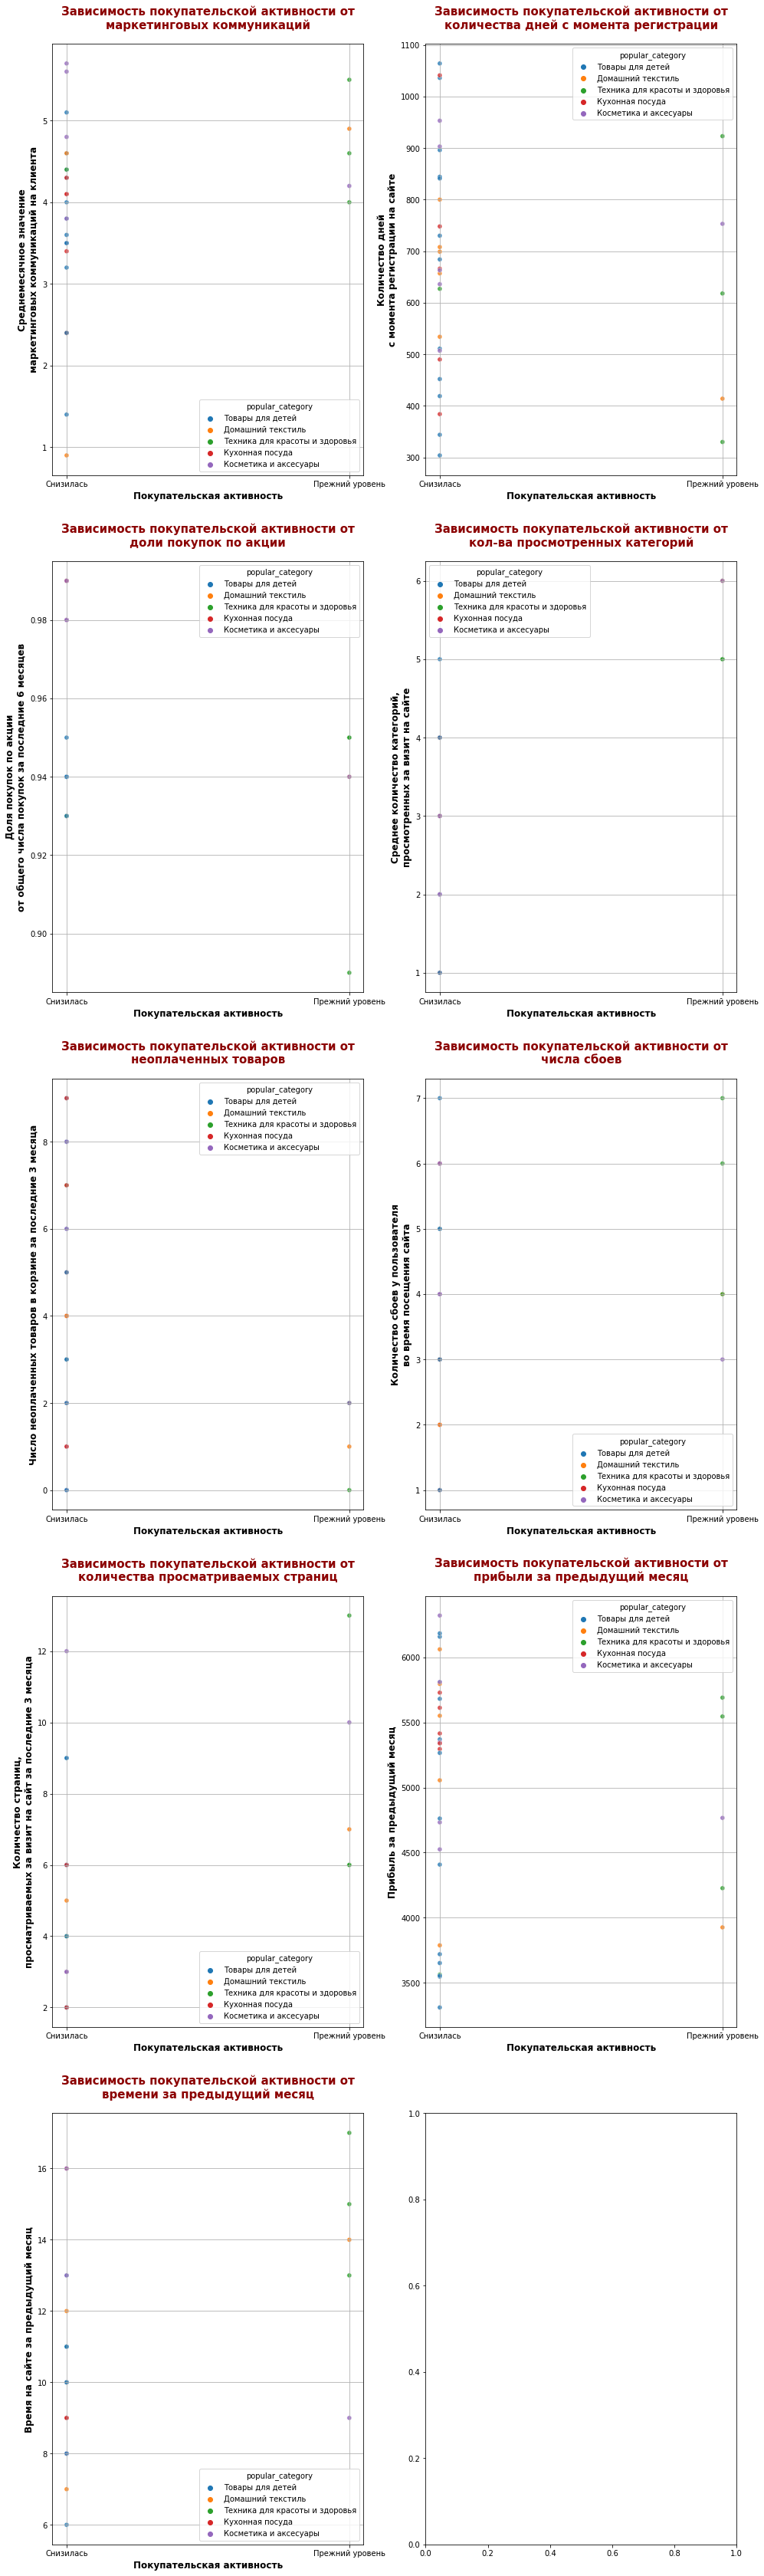

In [55]:
show_scatters(df=high_promo_ratio_customers, 
              target='predictions', 
              columns=num_params, 
              color_column='popular_category',
              mask=num_mask, 
              in_row=2, 
              alpha=0.8)

<hr>

<p style='text-align: justify;'>На графиках прослеживается, что клиенты, рассматриваемой категории, которые покупали товары из категории "Техника для красоты и здоровья" чаще всего сохраняют прежний уровень активности. Таким образом товары этой категории являются наиболее привлекательными для рассматриваемой категории, при планировании акций для таких клиентов стоит обращать на это внимание.<br><br>Категории товаров, которые, рассматриваемые клиенты, покупают единожды, после чего их покупательская активность снижается:</p>

 - Кухонная посуда;
 - Товары для детей;
 
Товары из категорий "Косметика и аксесуары" и "Домашний текстиль" однозначно не гарантируют сохранение или снижение покупательской активности.

Посчитаем среднюю месячную выручку по разным категориям и средний разброс выручки между разными периодами по разным категориям.
<hr>

In [56]:
high_promo_ratio_customers['first_average_month_revenue'] = (high_promo_ratio_customers['befor_last_month_revenue'] + 
                                                             high_promo_ratio_customers['previous_month_revenue']) / 2
high_promo_ratio_customers['second_average_month_revenue'] = (high_promo_ratio_customers['previous_month_revenue'] + 
                                                              high_promo_ratio_customers['current_month_revenue']) / 2
high_promo_ratio_customers['average_month_revenue'] = (high_promo_ratio_customers['first_average_month_revenue'] + 
                                                       high_promo_ratio_customers['second_average_month_revenue']) / 2

high_promo_ratio_customers['first_difference_month_revenue'] = abs(high_promo_ratio_customers['befor_last_month_revenue'] - 
                                                                   high_promo_ratio_customers['previous_month_revenue']) / 2
high_promo_ratio_customers['second_difference_month_revenue'] = abs(high_promo_ratio_customers['previous_month_revenue'] - 
                                                                    high_promo_ratio_customers['current_month_revenue']) / 2
high_promo_ratio_customers['average_difference_month_revenue'] = \
                                        (high_promo_ratio_customers['first_difference_month_revenue'] + 
                                        high_promo_ratio_customers['second_difference_month_revenue']) / 2
high_promo_ratio_customers.head()

,id,predictions,customer_activity,service_type,report_permission,six_month_activity,present_month_activity,duration,six_month_promotional_ratio,popular_category,...,current_month_revenue,previous_month_revenue,current_month_time,previous_month_time,first_average_month_revenue,second_average_month_revenue,average_month_revenue,first_difference_month_revenue,second_difference_month_revenue,average_difference_month_revenue
13,215364,Снизилась,Снизилась,премиум,да,4.3,4,708,0.98,Домашний текстиль,...,5484.8,5795.5,9,11,5368.75,5640.15,5504.450,426.75,155.35,291.050
490,215842,Снизилась,Снизилась,премиум,да,4.3,3,1036,0.94,Товары для детей,...,4740.8,4408.0,10,8,4525.00,4574.40,4549.700,117.00,166.40,141.700
318,215670,Снизилась,Снизилась,стандарт,да,4.1,4,490,0.98,Кухонная посуда,...,5723.1,5415.0,11,9,4989.00,5569.05,5279.025,426.00,154.05,290.025
48,215400,Снизилась,Снизилась,стандарт,нет,4.4,5,304,0.94,Товары для детей,...,5691.4,5681.0,9,11,5060.00,5686.20,5373.100,621.00,5.20,313.100
56,215408,Снизилась,Снизилась,премиум,да,2.4,3,666,0.98,Кухонная посуда,...,5029.8,5295.0,12,10,4864.50,5162.40,5013.450,430.50,132.60,281.550


In [57]:
high_promo_ratio_customers.pivot_table(index='popular_category', 
                                       values='average_month_revenue', 
                                       aggfunc='mean').reset_index().sort_values('average_month_revenue', ascending=False)

,popular_category,average_month_revenue
2,Кухонная посуда,5376.655000
1,Косметика и аксесуары,5222.925000
0,Домашний текстиль,5030.320833
3,Техника для красоты и здоровья,4922.125000
4,Товары для детей,4765.807692


In [58]:
high_promo_ratio_customers.pivot_table(index='popular_category', 
                                       values='average_difference_month_revenue', 
                                       aggfunc='mean').reset_index().sort_values('average_difference_month_revenue', 
                                                                                 ascending=False)

,popular_category,average_difference_month_revenue
3,Техника для красоты и здоровья,356.175000
2,Кухонная посуда,333.425000
0,Домашний текстиль,303.320833
4,Товары для детей,291.323077
1,Косметика и аксесуары,264.275000


<hr>
<font size=4.5><b>Итоги раздела:</b></font>

<p style='text-align: justify;'>Клиенты с высокой долей покупок по акции, которые покупали товары из категории "Техника для красоты и здоровья" чаще всего сохраняют прежний уровень активности. Несмотря на то что среднемесячная выручка по данной категории на 4 месте в рейтинге, клиенты, ориентированные на эту категорию чаще созраняют покупательскую активность, а значит приносят постоянную прибыль.</p>

<p style='text-align: justify;'>У рассматриваемых клиентов, ориентированных на категорию товаров "Товары для детей", очень часто снижается покупательская активность, а также эта категория приносит наименьшую среднюю месячную выручку, поэтому стоит меньше устраивать акции на данную категорию для рассматриваемой категории клиентов.</p>

Категория товаров "Кухонная посуда" приносит наибольшую среднемесячную выручку, но у клиентов чаще снижается покупательская активность, таким образом категория приносит хоть и большую, но непостоянную прибыль.

<hr>

 <a id='conclusion'></a>

## Итоговые выводы

<p style='text-align: justify;'>В данной работе проводен анализ данных для разработки системы персонализированных предложений для удержания постоянных клиентов интернет-магазина <b>«В один клик»</b>. В качестве иходных данных были предоставленны 4 csv файла с информацией о:</p> 

 - поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении; 
 - выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом;
 - времени (в минутах), которое покупатель провёл на сайте в течение периода;
 - среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
 
<p style='text-align: justify;'>В результате предобработки данных были изменены названия столбцов на названия, соответствующие формату snake_case. Были найдены неявные дубликаты <i>'предыдцщий_месяц'</i> и <i>'стандартт'</i> и заменены на корректные значения <i>'предыдущий_месяц'</i> и <i>'стандарт'</i>. А также удалены найденные явные дубликаты.</p> 
 
<br><br>
<p style='text-align: justify;'>Модель, которая предскажет вероятность снижения покупательской активности была получена с использованием инструмента optuna, предназначенным для поиска лучшей из нескольких  моделей с различными гиперпараметрами. В качестве метрики использовалась метрика f1, качество лучшей модели - 0.814. Анализ важности признаков модели показал:</p> 

Из графика следует, что к классу 0 - <b>Прежний уровень активности клиента</b>, больше всего склоняют признаки:
 - <b>three_month_average_pages</b> — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца;
 - <b>average_category_view_per_visit</b> — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца;
 - <b>previous_month_time</b> - значение времени, проведённого на сайте, в минутах за предыдущий месяц;
 - <b>current_month_time</b> - значение времени, проведённого на сайте, в минутах за текущий месяц; 
 - <b>six_month_activity</b> — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев;
 - <b>befor_last_month_revenue</b> - значение прибыли за позапрошлый месяц;
 
К классу 1 - <b>Активность клиента снизилась</b>, больше всего склоняют признаки:
 - <b>three_month_outstanding_products_amount</b> — среднее количество неоплаченных товаров в корзине за последние 3 месяца;
 - <b>six_month_promotional_ratio</b> — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев;
 - <b>previous_month_revenue</b> - Занчение прибыли за прошлый месяц;
 
 
Остальные признаки влияют на целевой признак в меньшей степени.
<br><br><br>
<p style='text-align: justify;'>Был рассмотрен сегмент покупателей с высокой долей покупок по акции и высокой вероятностью снижения покупательской активности. 
    
<p style='text-align: justify;'>Клиенты с высокой долей покупок по акции, которые покупали товары из категории "Техника для красоты и здоровья" чаще всего сохраняют прежний уровень активности. Несмотря на то что среднемесячная выручка по данной категории на 4 месте в рейтинге, клиенты, ориентированные на эту категорию чаще созраняют покупательскую активность, а значит приносят постоянную прибыль.</p>

<p style='text-align: justify;'>У рассматриваемых клиентов, ориентированных на категорию товаров "Товары для детей", очень часто снижается покупательская активность, а также эта категория приносит наименьшую среднюю месячную выручку, поэтому стоит меньше устраивать акции на данную категорию для рассматриваемой категории клиентов.</p>

Категория товаров "Кухонная посуда" приносит наибольшую среднемесячную выручку, но у клиентов чаще снижается покупательская активность, таким образом категория приносит хоть и большую, но непостоянную прибыль.
 